## Artificial Neural Network

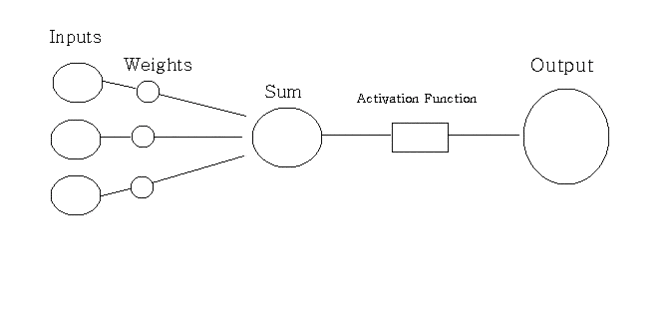

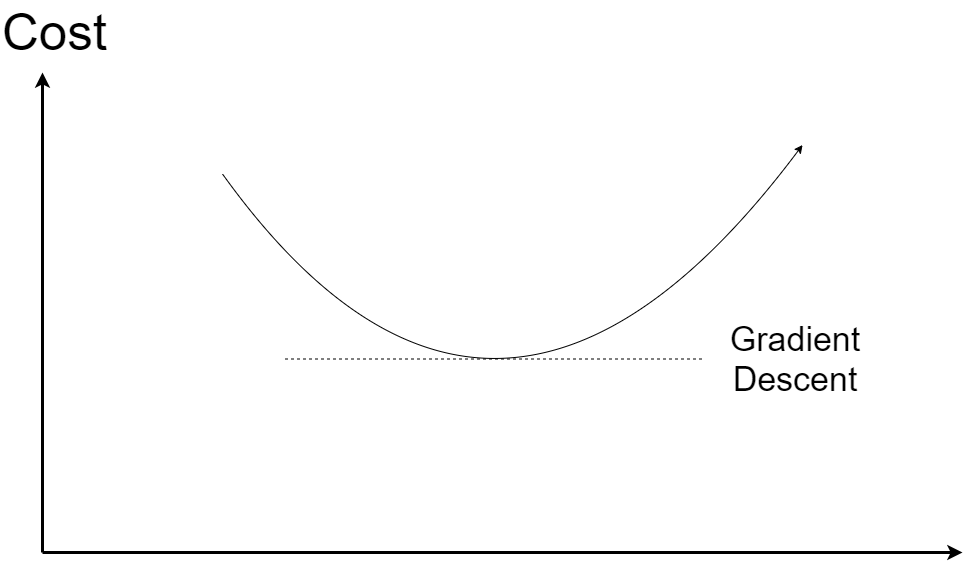

A Gradient Descent takes the lowest point of the cost function   

---

A Gradient descent uses the slope of a loss function at a certain point and tries to move downwards to find the lowest point of the function. However, if my function is not convex (with higher degrees freedom), I could end up at a local minimum rather than the global minimum of the function, and the network wouldn’t be as efficient.

Therefore, I use the stochastic gradient descent method, which runs the function for each and every row and keeps updating the minimum of the cost function. This way, I have a higher chance of finding the global minimum. It is also actually faster than the gradient function since it is running smaller algorithms.

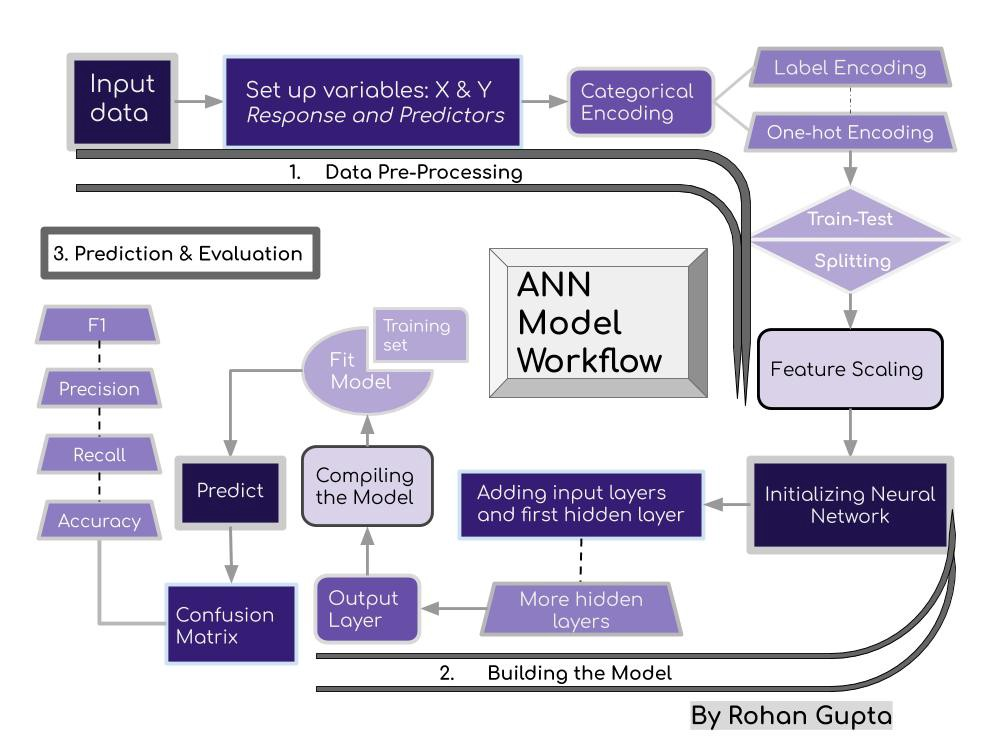

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [24]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

**Label Encoding the "Gender" column**  
Which converts the string into a numerical label as 0, 1, 2 etc. The way it works is that it creates separate columns for each variable and assigns them a value of 0 or 1 to denote whether they are male/female or not (0 = no, 1 = yes)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set   
The lines of code below show the shape of X_train, X_test, y_train, and y_test. As you can see, the data was split with a test size of 0.2, which means that Training sets have 8000 points of data, while Test sets have 2000.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling   
Now that the data has been fit into training and test sets, I will feature scale the data manually, so that the machine doesn’t anchor on higher values and give us a biased prediction.   
For example, Salary is a higher number than age, which can cause the machine to put more weight on Salary in the model. Therefore, we want to scale all values between -1 and 1, so it is comprehensible to the model.

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [19]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 4s 2ms/step - loss: 0.5672 - accuracy: 0.7700
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7934
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7975
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.8049
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8179
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8271
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3894 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8658
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8637
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8634
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8636
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8629
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8636
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8635
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8635
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8641
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 

## Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

In [20]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 162ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [21]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1526   69]
 [ 200  205]]


0.8655